In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/FullData(2016,2017,2018,2021,2022).csv'
df = pd.read_csv(file_path)

print(df)

           Date  Hour  Discharge Rate (cumecs)  Rainfall Data (mm)  \
0      5/1/2016     1                14.640601                 0.0   
1      5/1/2016     2                14.800940                 0.0   
2      5/1/2016     3                14.962151                 0.0   
3      5/1/2016     4                15.124236                 0.0   
4      5/1/2016     5                15.124236                 0.0   
...         ...   ...                      ...                 ...   
5155  5/31/2022    20               330.990000                 1.3   
5156  5/31/2022    21               327.960000                 0.0   
5157  5/31/2022    22               324.190000                 0.0   
5158  5/31/2022    23               321.940000                 0.0   
5159  5/31/2022    24               318.950000                 0.0   

      Water Level (m)  
0                0.89  
1                0.90  
2                0.91  
3                0.92  
4                0.92  
...            

Final One- 1 method

Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             23
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64


C:\Users\Janith\AppData\Local\Temp\ipykernel_36768\552638196.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
113/113 - 4s - 35ms/step - loss: 4.2801 - mean_absolute_error: 1.4503 - val_loss: 0.3245 - val_mean_absolute_error: 0.3527
Epoch 2/100
113/113 - 0s - 3ms/step - loss: 0.5757 - mean_absolute_error: 0.4927 - val_loss: 0.1981 - val_mean_absolute_error: 0.2414
Epoch 3/100
113/113 - 0s - 3ms/step - loss: 0.4943 - mean_absolute_error: 0.4453 - val_loss: 0.1829 - val_mean_absolute_error: 0.2181
Epoch 4/100
113/113 - 0s - 3ms/step - loss: 0.4641 - mean_absolute_error: 0.4280 - val_loss: 0.1524 - val_mean_absolute_error: 0.1999
Epoch 5/100
113/113 - 0s - 3ms/step - loss: 0.4372 - mean_absolute_error: 0.4127 - val_loss: 0.1724 - val_mean_absolute_error: 0.2241
Epoch 6/100
113/113 - 0s - 3ms/step - loss: 0.4016 - mean_absolute_error: 0.3954 - val_loss: 0.1531 - val_mean_absolute_error: 0.2228
Epoch 7/100
113/113 - 0s - 3ms/step - loss: 0.3700 - mean_absolute_error: 0.3784 - val_loss: 0.1599 - val_mean_absolute_error: 0.2285
Epoch 8/100
113/113 - 0s - 3ms/step - loss: 0.3359 - mean_abs

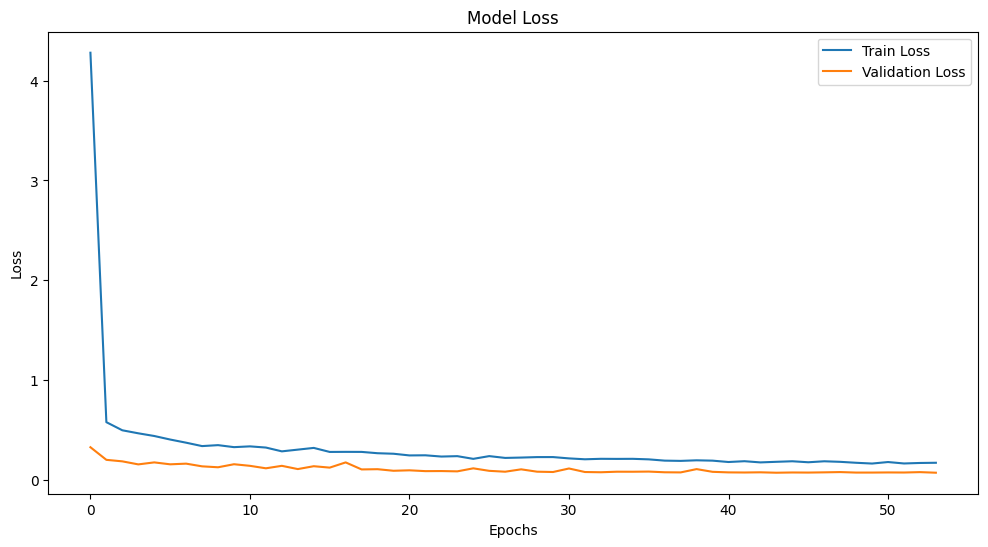

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    1.07                       1.05                    1.05   
1                    0.98                       0.97                    0.94   
2                    7.55                       7.45                    7.62   
3                    3.00                       2.99                    2.87   
4                    0.48                       0.54                    0.46   
5                    3.85                       3.83                    3.78   
6                    0.55                       0.65                    0.53   
7                    1.44                       1.55                    1.48   
8                    1.79                       1.84                    1.71   
9                    6.02                       5.97                    5.98   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                       1.05                    1.03   
1      

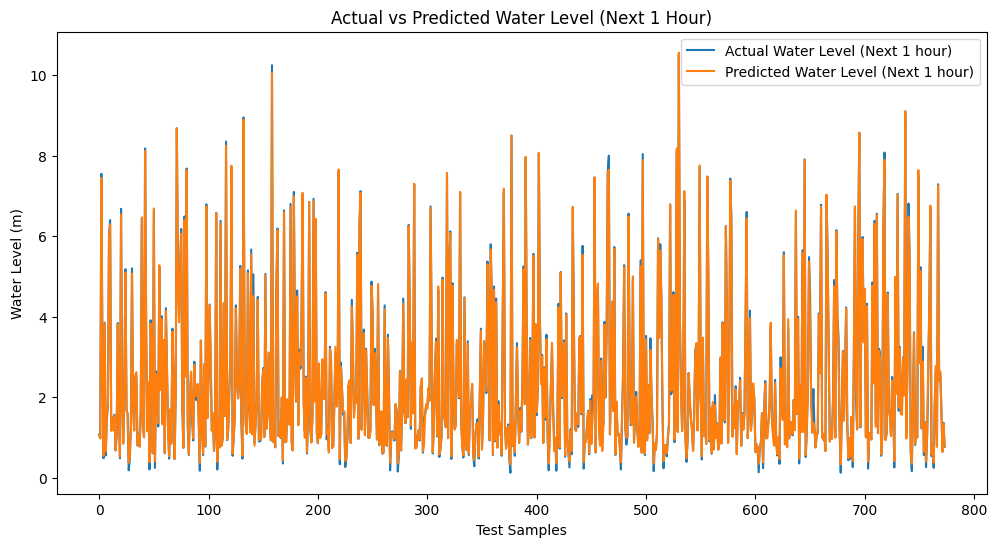

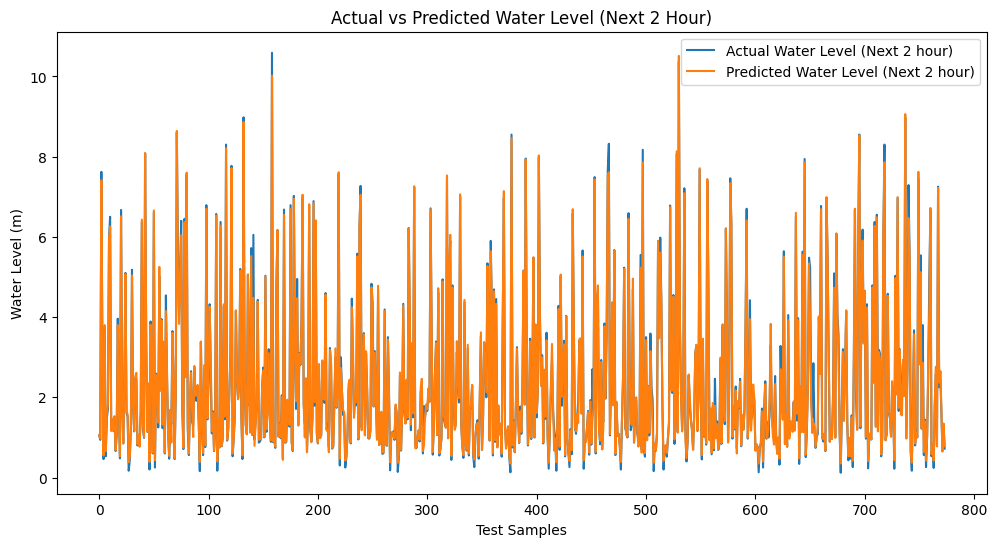

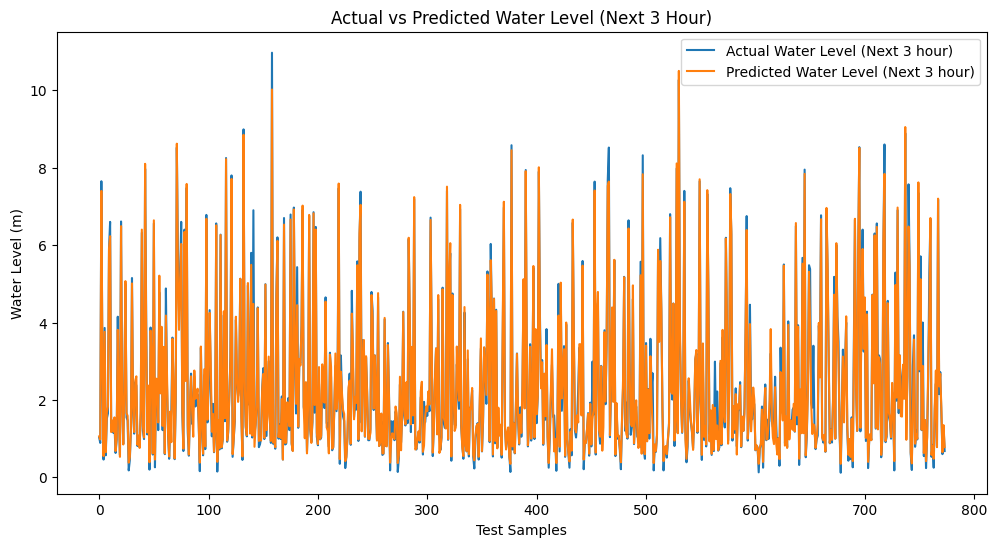

Mean Absolute Error for 1st hour prediction: 0.06
Mean Absolute Error for 2nd hour prediction: 0.11
Mean Absolute Error for 3rd hour prediction: 0.17


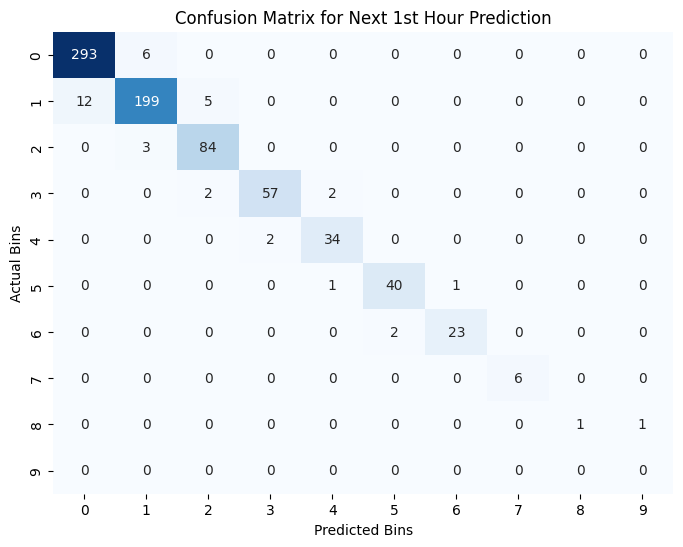

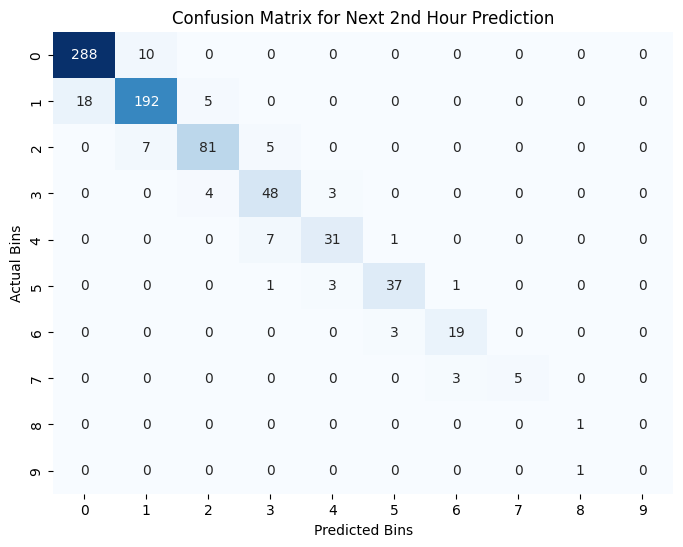

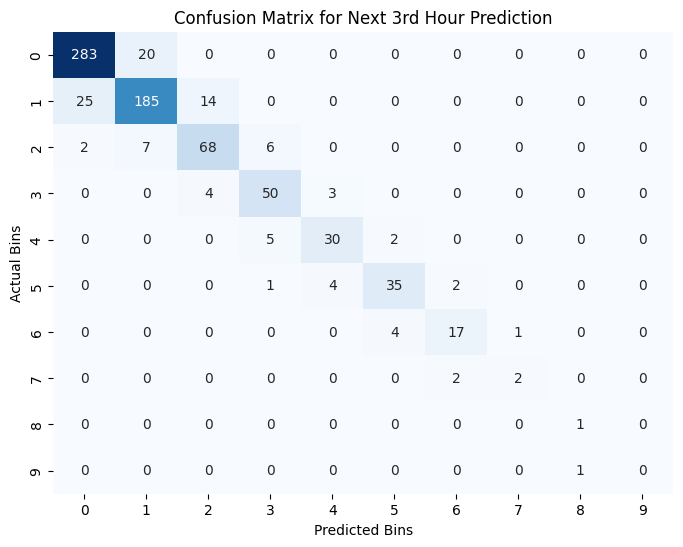

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
import seaborn as sns


# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/FullData(2016,2017,2018,2021,2022).csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 1: Forward Fill (propagate last valid observation forward to fill nulls)
df.fillna(method='ffill', inplace=True)

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
# df.interpolate(method='linear', inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Prepare data using 3 rows (time steps) as input to predict next 3 hours
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_seq, y_seq = create_sequences(X, y, time_steps)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs for 1st, 2nd, and 3rd hour predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Round the predictions to 2 decimal places
y_pred = np.round(y_pred, 2)
y_test = np.round(y_test, 2)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """Calculate accuracy by checking if predicted values are within a threshold of actual values."""
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Create confusion matrices for each hour's prediction
def create_confusion_matrix(y_true, y_pred, threshold=0.1):
    """Create confusion matrix based on whether predictions are within the threshold."""
    y_true_binary = (y_true > np.mean(y_true)).astype(int)
    y_pred_binary = (y_pred > np.mean(y_pred)).astype(int)
    return confusion_matrix(y_true_binary, y_pred_binary)

conf_matrix_1st_hour = create_confusion_matrix(y_test[:, 0], y_pred[:, 0])
conf_matrix_2nd_hour = create_confusion_matrix(y_test[:, 1], y_pred[:, 1])
conf_matrix_3rd_hour = create_confusion_matrix(y_test[:, 2], y_pred[:, 2])

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))

# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour:.2f}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour:.2f}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour:.2f}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)  # Create 10 bins
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')


Final one - 2 method

Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             23
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64
Epoch 1/150


C:\Users\Janith\AppData\Local\Temp\ipykernel_36768\1321222583.py:23: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


113/113 - 3s - 27ms/step - loss: 4.3409 - mean_absolute_error: 1.4598 - val_loss: 0.3312 - val_mean_absolute_error: 0.3336
Epoch 2/150
113/113 - 0s - 3ms/step - loss: 0.6362 - mean_absolute_error: 0.5095 - val_loss: 0.2126 - val_mean_absolute_error: 0.2479
Epoch 3/150
113/113 - 0s - 4ms/step - loss: 0.5090 - mean_absolute_error: 0.4511 - val_loss: 0.1767 - val_mean_absolute_error: 0.2213
Epoch 4/150
113/113 - 0s - 4ms/step - loss: 0.4351 - mean_absolute_error: 0.4150 - val_loss: 0.1614 - val_mean_absolute_error: 0.2085
Epoch 5/150
113/113 - 0s - 4ms/step - loss: 0.4038 - mean_absolute_error: 0.4039 - val_loss: 0.1542 - val_mean_absolute_error: 0.2066
Epoch 6/150
113/113 - 0s - 4ms/step - loss: 0.4013 - mean_absolute_error: 0.3959 - val_loss: 0.1559 - val_mean_absolute_error: 0.2186
Epoch 7/150
113/113 - 0s - 4ms/step - loss: 0.3615 - mean_absolute_error: 0.3745 - val_loss: 0.1399 - val_mean_absolute_error: 0.2021
Epoch 8/150
113/113 - 0s - 4ms/step - loss: 0.3388 - mean_absolute_error:

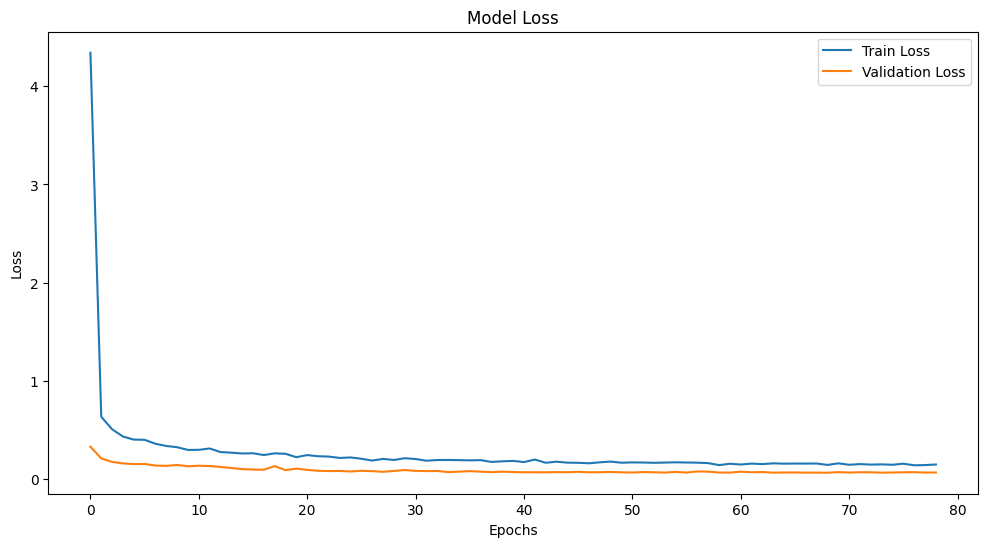

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    1.07                       1.03                    1.05   
1                    0.98                       0.97                    0.94   
2                    7.55                       7.48                    7.62   
3                    3.00                       2.97                    2.87   
4                    0.48                       0.52                    0.46   
5                    3.85                       3.81                    3.78   
6                    0.55                       0.60                    0.53   
7                    1.44                       1.56                    1.48   
8                    1.79                       1.81                    1.71   
9                    6.02                       5.99                    5.98   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                       1.04                    1.03   
1      

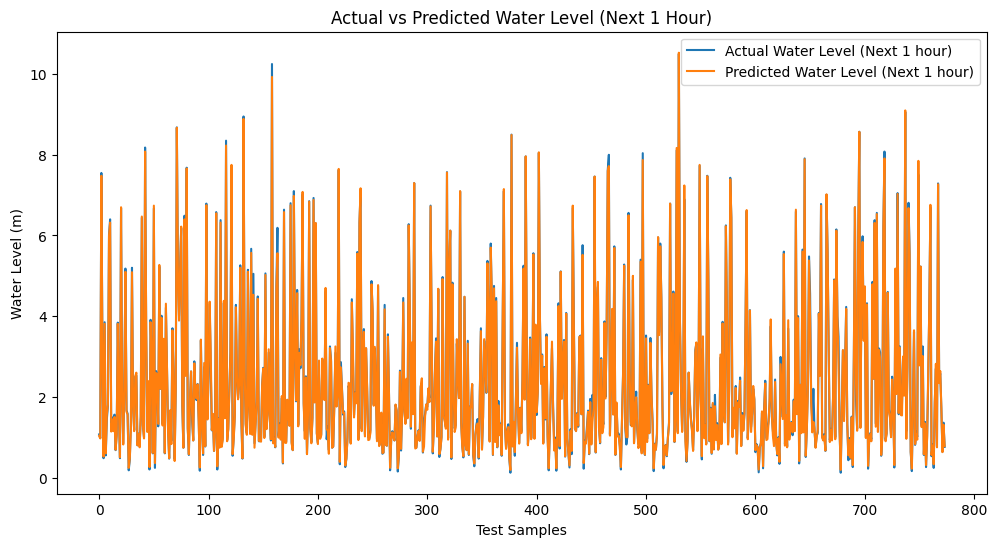

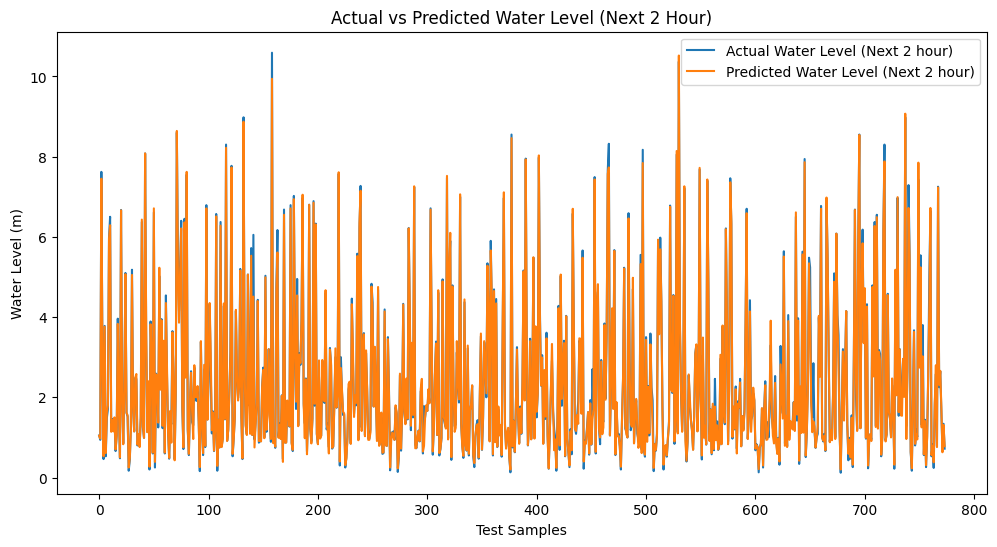

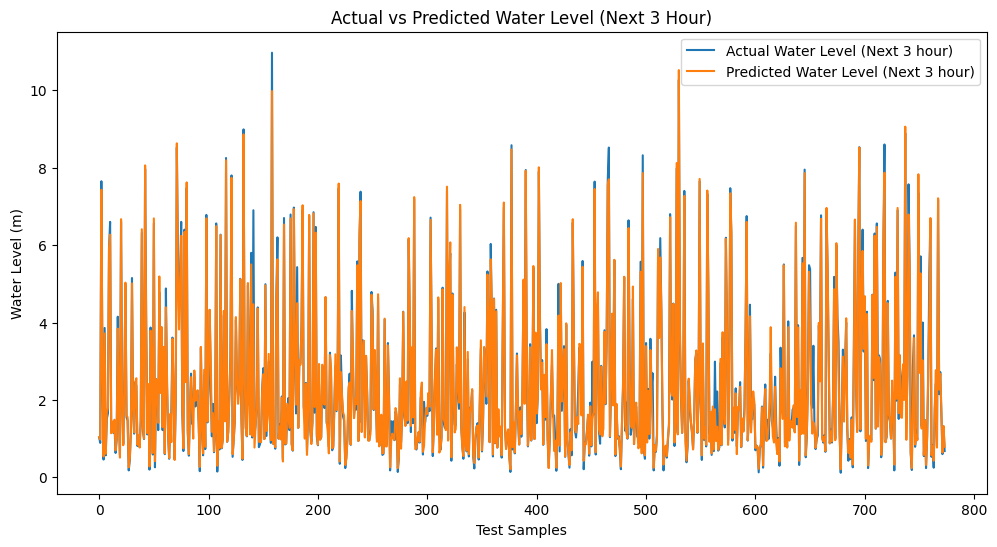

Mean Absolute Error for 1st hour prediction: 0.06
Mean Absolute Error for 2nd hour prediction: 0.10
Mean Absolute Error for 3rd hour prediction: 0.15


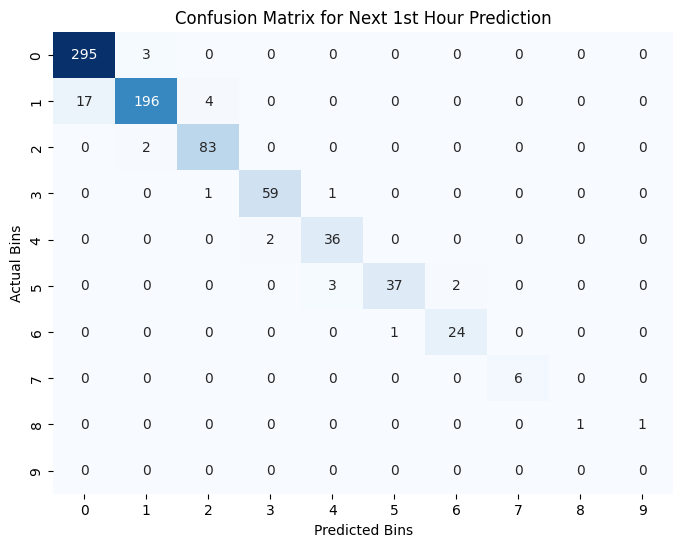

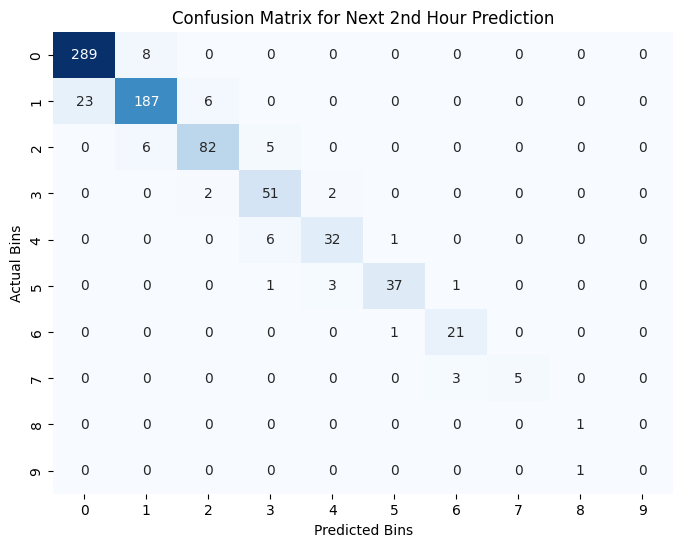

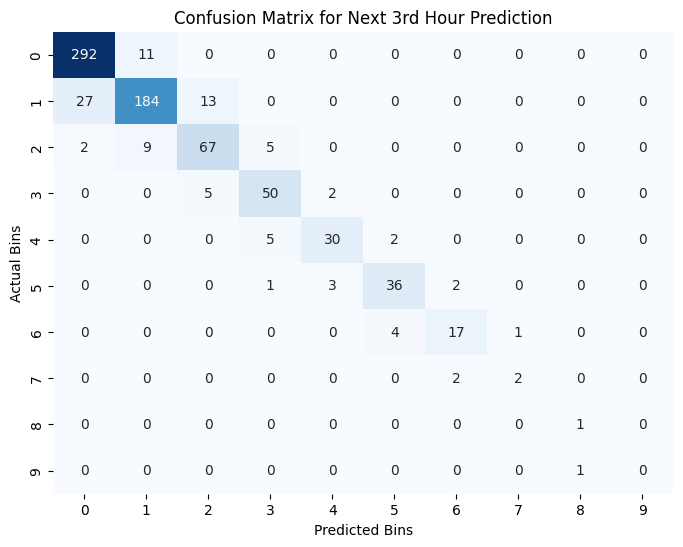

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
import seaborn as sns


# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/FullData(2016,2017,2018,2021,2022).csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
df.interpolate(method='linear', inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Prepare data using 3 rows (time steps) as input to predict next 3 hours
def create_sequences(X, y, time_steps=3):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps), :])
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_seq, y_seq = create_sequences(X, y, time_steps)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[2])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs for 1st, 2nd, and 3rd hour predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Round the predictions to 2 decimal places
y_pred = np.round(y_pred, 2)
y_test = np.round(y_test, 2)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """Calculate accuracy by checking if predicted values are within a threshold of actual values."""
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Create confusion matrices for each hour's prediction
def create_confusion_matrix(y_true, y_pred, threshold=0.1):
    """Create confusion matrix based on whether predictions are within the threshold."""
    y_true_binary = (y_true > np.mean(y_true)).astype(int)
    y_pred_binary = (y_pred > np.mean(y_pred)).astype(int)
    return confusion_matrix(y_true_binary, y_pred_binary)

conf_matrix_1st_hour = create_confusion_matrix(y_test[:, 0], y_pred[:, 0])
conf_matrix_2nd_hour = create_confusion_matrix(y_test[:, 1], y_pred[:, 1])
conf_matrix_3rd_hour = create_confusion_matrix(y_test[:, 2], y_pred[:, 2])

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))

# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour:.2f}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour:.2f}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour:.2f}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)  # Create 10 bins
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')
